In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Goal It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
# Get number of observations for test and train
print([len(x) for x in [train_df,test_df]])

[1460, 1459]


In [5]:
# Combine it into one large file for data exploration and cleaning
combined_df = pd.concat([train_df,test_df])
print(combined_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

# **DATA CLEANING**

In [7]:

# Quick look at potential missing values
print(combined_df.info())
#Instead of bluntly deleting these observations,
#we will do our best to come up with plausible fills.

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [8]:
"""
we change the data type of two variables:
“MSSubClass” and “MoSold” as these are categorical variables and not integers.
"""

'\nwe change the data type of two variables:\n“MSSubClass” and “MoSold” as these are categorical variables and not integers.\n'

In [9]:
# Classify int variables into category if needed
combined_df["MSSubClass"] = combined_df["MSSubClass"].astype("category")

combined_df["MoSold"] = combined_df["MoSold"].astype("category")

In [10]:
# Cleaning categorical variables
"""
We impute the mode of the “Neighborhood” and “MSSubClass” when we can do so.
Else, we impute the column’s own mode.
The logic behind this is that houses in the same
neighborhood and from the same class might have the same
characteristics as most houses from the same class in their area.
"""

'\nWe impute the mode of the “Neighborhood” and “MSSubClass” when we can do so.\nElse, we impute the column’s own mode.\nThe logic behind this is that houses in the same\nneighborhood and from the same class might have the same\ncharacteristics as most houses from the same class in their area.\n'

In [11]:
# Categorical data impute with mode of neighborhood and MSSubClass
# or just mode of own column if missing
missing_vals = ["MSZoning", "Alley", "Utilities", 'MasVnrType', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"Electrical",
                'KitchenQual','Functional',
                'GarageType',"SaleType", 'GarageFinish','GarageQual',
                'GarageCond','Exterior1st', 'Exterior2nd','FireplaceQu', "PoolQC",
                "Fence", "MiscFeature"]
for missing_val in missing_vals:
    try:
        combined_df[missing_val] = combined_df.groupby(['MSSubClass','Neighborhood'])[missing_val].transform(lambda x : x.fillna(x.mode()[0]))
    except:
        combined_df[missing_val].fillna((combined_df[missing_val].mode()[0]),inplace=True)

In [12]:
# Add "Other" category as most elements are missing
combined_df["PoolQC"] = combined_df["PoolQC"].fillna("Other")

In [13]:
#Cleaning continuous variables
#In the case of continuous variables,
#we impute the values with the mean of the group that makes the most sense.
# Continuous data
missing_vals = ["LotFrontage", 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF1','TotalBsmtSF',
                'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',]

impute_vals = ["LotConfig" ,"Neighborhood",'BsmtFinType1',
               'BsmtFinType2','BsmtQual', 'BsmtQual', 'BsmtQual',
               'GarageType', 'GarageType']

for missing_val,impute_val in zip(missing_vals,impute_vals):
    combined_df[missing_val] = combined_df[missing_val].fillna(combined_df.groupby(impute_val)[missing_val].transform("mean"))

"""
E.g. for the “LotFrontage”,
we group the “LotFrontage” of the non-missing values by “LotConfig”,
compute the mean there on and then apply this mean to the matching groups of missing values.
"""

'\nE.g. for the “LotFrontage”,\nwe group the “LotFrontage” of the non-missing values by “LotConfig”,\ncompute the mean there on and then apply this mean to the matching groups of missing values.\n'

In [14]:
# Continuous impute data based on other continuous data
missing_vals = ['GarageYrBlt']
impute_vals = ['YearBuilt']
for missing_val,impute_val in zip(missing_vals,impute_vals):
    combined_df[missing_val] = combined_df[missing_val].fillna(combined_df[impute_val])

"""
For the “GarageYrBlt” variable,
we impute the “YearBuilt” of the house as it may be that the
garage and home were built at the same time.

"""


'\nFor the “GarageYrBlt” variable,\nwe impute the “YearBuilt” of the house as it may be that the\ngarage and home were built at the same time.\n\n'

In [15]:
# Fill all leftovers with mean
for missing_val in combined_df.columns.values.tolist():
    if missing_val == "SalePrice":
        pass
    else:
        try:
            combined_df[missing_val]=combined_df[missing_val].fillna(combined_df[missing_val].mean())
        except:
            pass

In [16]:
# List of cols with missing values
print([col for col in combined_df.columns if combined_df[col].isnull().any()])

['SalePrice']


# **Feature Engineering**

In [18]:
"""
we’ll add some features that could improve our models’ performance.
First, we’ll add some “age” features as the age might by more relevant than the “year”.
It is indeed, easier to see the relative difference between a 10 and a 20-year-old house
than between a house that was built in 2010 and one built in 2020.
"""

'\nwe’ll add some features that could improve our models’ performance.\nFirst, we’ll add some “age” features as the age might by more relevant than the “year”.\nIt is indeed, easier to see the relative difference between a 10 and a 20-year-old house\nthan between a house that was built in 2010 and one built in 2020.\n'

In [19]:
import datetime
year = datetime.date.today().year

combined_df["AgeSold"] = int(year) - combined_df["YrSold"].astype(int)
combined_df["AgeGarage"] = int(year) - combined_df["GarageYrBlt"].astype(int)
combined_df["AgeBuilt"] = int(year) - combined_df["YearBuilt"].astype(int)

In [20]:
# Add some features related to total area of the house
combined_df['TotalArea'] = combined_df['TotalBsmtSF'] + combined_df['1stFlrSF'] + combined_df['2ndFlrSF'] + combined_df['GrLivArea'] +combined_df['GarageArea']
combined_df['Bathrooms'] = combined_df['FullBath'] + combined_df['HalfBath']/2
combined_df['Year average']= (combined_df['YearRemodAdd']+combined_df['YearBuilt'])/2

# PLOTTING

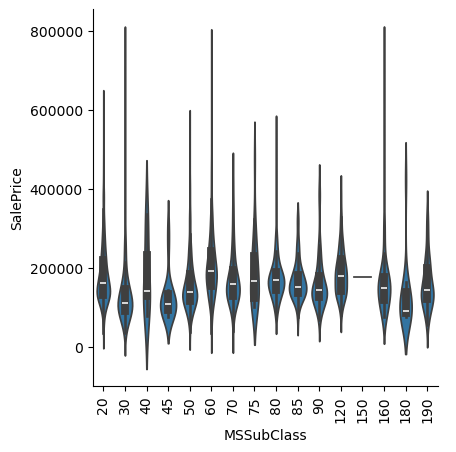

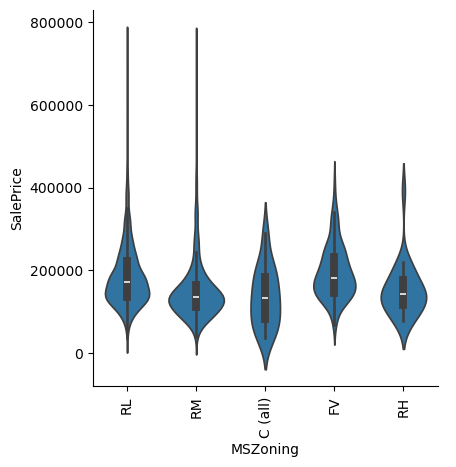

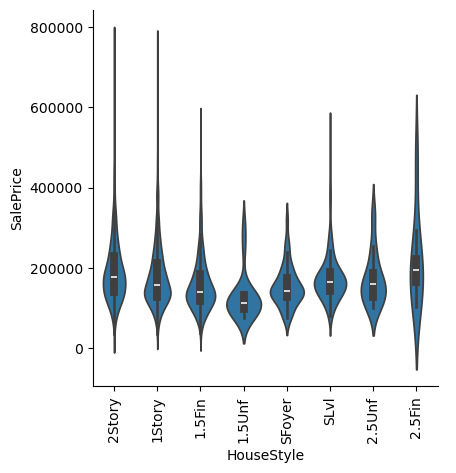

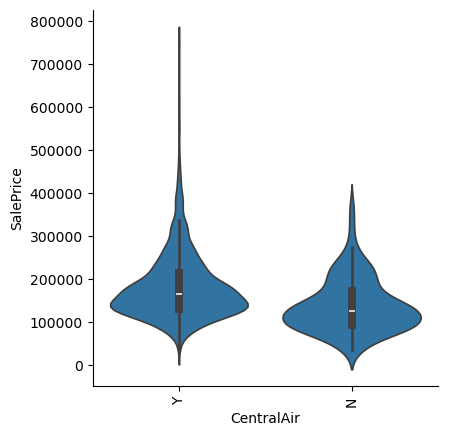

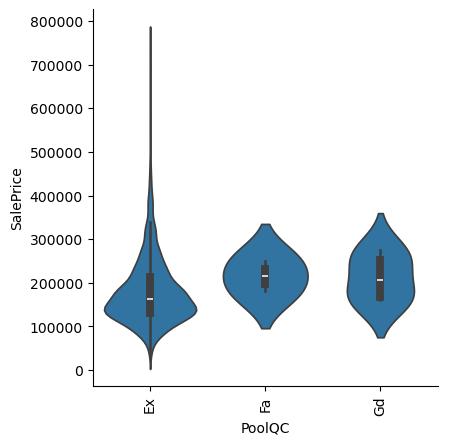

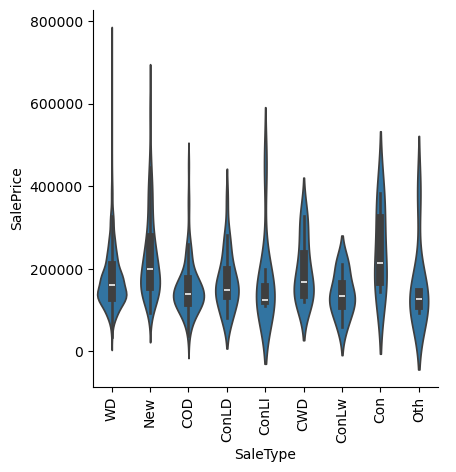

In [22]:
#Categorical variables versus “SalePrice”
import seaborn as sns

for element in ["MSSubClass", "MSZoning", "HouseStyle","CentralAir", "PoolQC", "SaleType"]:
    cat_plot = sns.catplot(y="SalePrice", x= element, kind="violin", legend="full", data=combined_df, height=4.5, aspect=3/ 3);
    cat_plot.set_xticklabels(rotation=90)


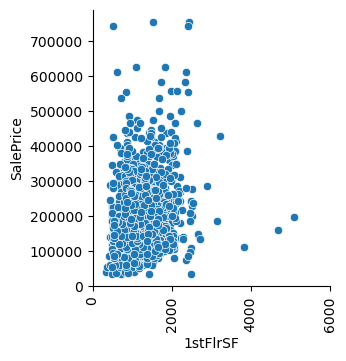

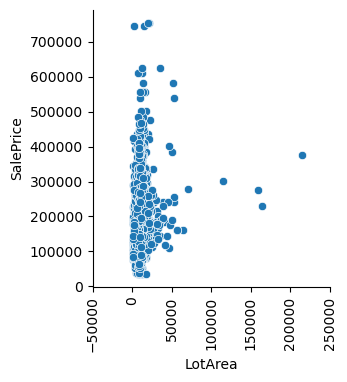

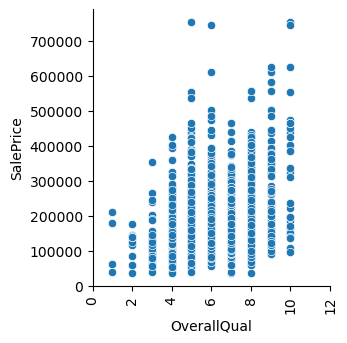

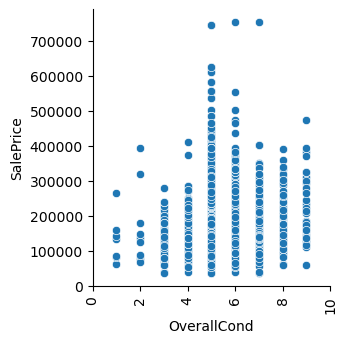

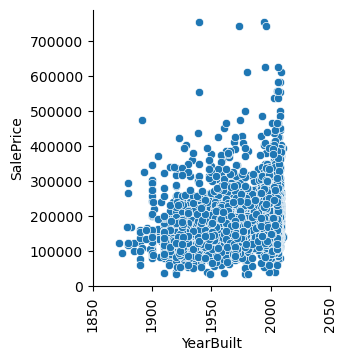

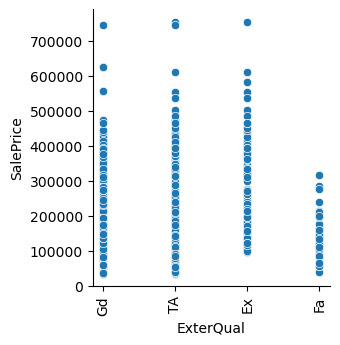

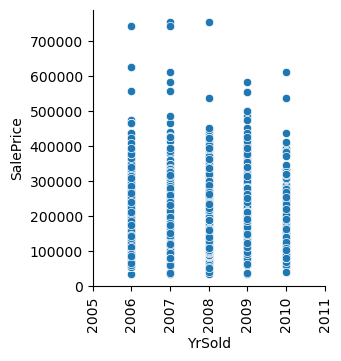

In [23]:
#Continuous variables versus “SalePrice”

for element in ["1stFlrSF", "LotArea", "OverallQual", "OverallCond", "YearBuilt","ExterQual", "YrSold"]:
    re_plot = sns.relplot(y="SalePrice", x= element, legend="full", data=combined_df, height=3.5, aspect=3 / 3,);
    re_plot.set_xticklabels(rotation=90)


In [24]:
"""
At a first look, continuous variable seem to be more or less correlated
with the “SalePrice”, certainly the “OverallQual”, “YearBuilt”
and surface of the house. When it comes to continuous variables,
we can see that the “MSSubClass” and “Neighborhood” provide some insights
into the “SalePrice”.
We review that with a correlation matrix.

"""

'\nAt a first look, continuous variable seem to be more or less correlated\nwith the “SalePrice”, certainly the “OverallQual”, “YearBuilt”\nand surface of the house. When it comes to continuous variables,\nwe can see that the “MSSubClass” and “Neighborhood” provide some insights\ninto the “SalePrice”.\nWe review that with a correlation matrix.\n\n'

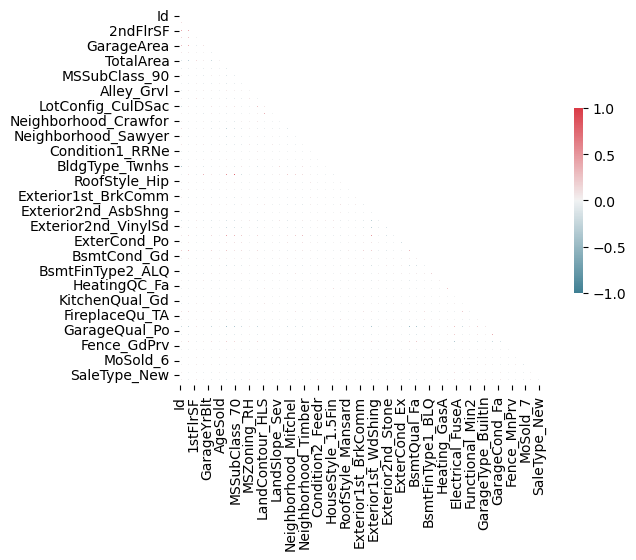

In [25]:
#import seaborn as sns
#from matplotlib import pyplot as plt

#correlation matrix
# corr_mat = combined_df.corr() ERROR #we have categorical data, but your model needs something numerical

# Convert categorical variables to numeric using one-hot encoding
combined_df_encoded = pd.get_dummies(combined_df)
# Calculate the correlation matrix on the encoded dataframe
corr_mat = combined_df_encoded.corr()

# mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat,dtype=bool))

"""
np.triu(): This function returns the upper triangle of the array passed to it,
meaning it sets all the elements below the main diagonal to zero (or False in this case).

np.ones_like(corr_mat): This creates a new array with the same shape as corr_mat
and fills it with ones. This array acts as a template with the same dimensions as
your correlation matrix.
"""
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_mat,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,
           cbar_kws={"shrink": .5})
import matplotlib.pyplot as plt
plt.show()

# Data transformation

In [27]:
#A last step building our models is transforming the data into a digestible format.
#An algorithm has no clues what a “SaleType” of “WD” means. 
#Instead it understands if there is a 1 or 0 in the “SaleType_WD column.

#get dummies
combined_df = pd.get_dummies(combined_df)

In [28]:
# split data set into test and train

train_df = combined_df[combined_df["SalePrice"]>0]

#find the houses with no saleprice value
test_df = combined_df[combined_df["SalePrice"].isna()]
test_df = test_df.drop(["SalePrice"],axis=1)

#Create the X-y sets

X_train_df = train_df.drop(["SalePrice"],axis=1)
y_train_df = train_df[["Id","SalePrice"]]

In [29]:
#Transform the skewed variables
"""
Some important variable might not be normally distributed (Skew and Kurtosis).
We can change that by applying a log transformation to the “SalePrice”.
"""
# Log transform the SalePrice as it is skewed
y_train_df["SalePrice"] = np.log1p(y_train_df["SalePrice"])

C:\Users\Cihan\AppData\Local\Temp\ipykernel_27776\3819185203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_df["SalePrice"] = np.log1p(y_train_df["SalePrice"])


In [30]:
#Set “Id” column as index
#We do not want to use the “Id” column in our model.
#We still want to keep it for our predictions later.

for element in [X_train_df, y_train_df, test_df]:
    element.set_index("Id",inplace=True)

In [31]:
#Scale the data
"""
Most algorithms rely on the distance between the predicted value
and real value in order to improve their predictions. It is thus best practice to
scale our data so as to make sure that these distances are not impacted by
the scale of a variable. E.g. errors from the surface of a house and its “OverallCond”
don’t have the same scale at all.
"""
#use RobustScaler() as we want to minimize the effect of outliers.
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()

# Scale the X_train set
X_train_scaled = scaler.fit_transform(X_train_df.values)
X_train_df = pd.DataFrame(X_train_scaled, index = X_train_df.index, columns= X_train_df.columns)

# Scale the X_test set
X_test_scaled = scaler.transform(test_df.values)
X_test_df = pd.DataFrame(X_test_scaled,index=test_df.index,columns=test_df.columns)

In [32]:
#Feature selection
#One simple method is to use the variance threshold and remove all
#the variables that do not change enough.
#only keep variables with some variance

from sklearn.feature_selection import VarianceThreshold
threshold_n=0.55
sel = VarianceThreshold(threshold=(threshold_n * (1-threshold_n)))
sel_var = sel.fit_transform(X_train_df)

#create the new datasets 
X_train_df= X_train_df[X_train_df.columns[sel.get_support(indices=True)]]
X_test_df=X_test_df[X_test_df.columns[sel.get_support(indices=True)]]

#check dataset
print(X_train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotFrontage        1460 non-null   float64
 1   LotArea            1460 non-null   float64
 2   OverallQual        1460 non-null   float64
 3   OverallCond        1460 non-null   float64
 4   YearBuilt          1460 non-null   float64
 5   YearRemodAdd       1460 non-null   float64
 6   MasVnrArea         1460 non-null   float64
 7   BsmtFinSF1         1460 non-null   float64
 8   BsmtFinSF2         1460 non-null   float64
 9   BsmtUnfSF          1460 non-null   float64
 10  TotalBsmtSF        1460 non-null   float64
 11  1stFlrSF           1460 non-null   float64
 12  2ndFlrSF           1460 non-null   float64
 13  LowQualFinSF       1460 non-null   float64
 14  GrLivArea          1460 non-null   float64
 15  BsmtFullBath       1460 non-null   float64
 16  FullBath           1460 non-n

# Modelling

In [34]:
#We start by splitting our training set into a train and test set.
#So that we can measure our results instantly. 
#We also set the random_state so as to have reproducible results.
from sklearn.model_selection import train_test_split
# Split our training set into train and test data
X_train,X_test,y_train,y_test =  train_test_split(X_train_df,y_train_df,test_size=0.05,
                                                 random_state=23)

**ElasticNet**

In [36]:
from sklearn.linear_model import ElasticNetCV, Lasso
# Set parameters to iterate over
alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

# Model with iterative fitting 
elastic_cv=ElasticNetCV(cv=5,max_iter=100000,alphas=alphas,l1_ratio=l1ratio)

#Fit model to the data
estc_reg = elastic_cv.fit(X_train,y_train)

#Predict on the test set from our training set
y_pred = estc_reg.predict(X_test)
from math import sqrt
from sklearn.metrics import mean_squared_error
print("ElasticRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

#Create Predictions
predictions=np.exp(estc_reg.predict(X_test_df))
my_pred_estc = pd.DataFrame({'Id': X_test_df.index, 'SalePrice': predictions})
"""
Why Apply the Exponential Function?
In many cases, the target variable in regression problems is transformed using
the natural logarithm (log) to normalize the distribution and make the model
training more stable and accurate. When the target variable is log-transformed,
the predictions made by the model are in the log scale.
To convert these predictions back to the original scale, you apply the exponential function.
"""

#Create CSV file
my_pred_estc.to_csv('pred_estc.csv',index=False)

ElasticRegressor RMSE: 0.1759215395679287


**Lasso**

In [38]:
from sklearn.model_selection import GridSearchCV

# Set parameters to iterate over
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

# Instantiate reg for gridsearch
lasso=Lasso()

# Conduct the gridsearch
lasso_reg=GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=15)
lasso_reg.fit(X_train,y_train)
best_params=lasso_reg.best_params_
print(best_params)

# Instantiate new lasso reg with best params
lasso_reg=Lasso(alpha=0.0001)

#Fit the model to the data
lasso_reg.fit(X_train,y_train)

#Predict on test set from training set
y_pred = lasso_reg.predict(X_test)
print("LassoRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

#Create Predictions
predictions=np.exp(lasso_reg.predict(X_test_df))
my_pred_lasso=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

#Create CSV file
my_pred_lasso.to_csv('pred_lasso.csv',index=False)

{'alpha': 0.003}
LassoRegressor RMSE: 0.17592577762655096


**Random Forest**

In [40]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#instantiate reg for gridsearch
rf = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
#conduct gridsearch
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,
                       cv=3,n_jobs=-1,verbose=2)

#Fit grid search to the data
grid_search.fit(X_train_df,y_train_df)
print(grid_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Cihan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
256 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Cihan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cihan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Cihan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Cihan\anaconda3\Lib\site-packa

{'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [41]:
# Create a random forest with best parameters
rf_reg=RandomForestRegressor(bootstrap=True,max_depth=90,max_features='sqrt',
                            min_samples_leaf=4,min_samples_split=8,
                            n_estimators=100,n_jobs=-1,random_state=12)

#Fit model to the data
rf_reg.fit(X_train,y_train)

#Predict on test set from training set
y_pred_rf=rf_reg.predict(X_test)
print("RandomForestRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred_rf)))

#Create predictions
predictions=np.exp(rf_reg.predict(X_test_df))
my_pred_rf=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

#Create CSV file
my_pred_rf.to_csv('pred_rf.cvs',index=False)

RandomForestRegressor RMSE: 0.18934271130729607


**AdaBoost**

In [43]:
# Grid search for best params
param_grid = {
 'n_estimators': [50, 100, 200],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

from sklearn.ensemble import AdaBoostRegressor
# Instantiate reg for gridsearch
ab_reg=AdaBoostRegressor()

# Conduct the gridsearch
grid_search = GridSearchCV(estimator = ab_reg, param_grid = param_grid,
                           cv = 4, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_df,y_train_df)
print(grid_search.best_params_)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}


In [44]:
# Create a random forest with best parameters
ab_reg=AdaBoostRegressor(learning_rate=0.1,loss='exponential',
                         n_estimators=200,random_state=12)

# Fit the model to the data
ab_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred_ab=ab_reg.predict(X_test)
print("AdaBoostRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred_ab)))

#Create Predictions
predictions=np.exp(ab_reg.predict(X_test_df))
my_pred_ab=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

#Create CSV file
my_pred_ab.to_csv('pred_ab.csv',index=False)

AdaBoostRegressor RMSE: 0.2071621254952211


**XGBoost**

In [46]:
from xgboost.sklearn import XGBRegressor

# Grid search for best params
param_grid = {'max_depth':[3,4],
          'learning_rate':[0.01,0.03],
          'min_child_weight':[1,3],
          'reg_lambda':[0.1,0.5],
          'reg_alpha':[1,1.5],      
          'gamma':[0.1,0.5],
          'subsample':[0.4,0.5],
         'colsample_bytree':[0.4,0.5],
}

# Instantiate reg for gridsearch
reg = XGBRegressor()

# Conduct the gridsearch
grid_search=GridSearchCV(estimator=reg,param_grid=param_grid,cv=4,n_jobs=-1,
                        verbose=True)


# Fit the grid search to the data
grid_search.fit(X_train_df,y_train_df)
print(grid_search.best_params_)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.5}


In [47]:
# Create a regressor with best parameters
xgb_reg=XGBRegressor(learning_rate=0.03,n_estimators=3460,max_depth=4,min_child_weight=1,
                    gamma=0.1,subsample=0.5,colsample_bytree=0.5,objective='reg:squarederror',
                    nthread=-1, scale_pos_weight=1, seed=27,reg_alpha=1)

#Fit model to the data
xgb_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred = xgb_reg.predict(X_test)
print("XGBoostRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

#Create predictions
predictions = np.exp(xgb_reg.predict(X_test_df))
my_pred_xgb = pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

#create csv file
my_pred_xgb.to_csv('pred_xgb.csv',index=False)

XGBoostRegressor RMSE: 0.17304485524013197


**ANN with Keras**

In [49]:
!pip install keras
!pip install tensorflow
from keras.layers import Dense, Activation
from keras.models import Sequential
# NEURAL NETWORK
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32,activation='relu',input_shape=(42,)))

#second hidden layer
model.add(Dense(units=317,activation='relu'))

#third hidden layer
model.add(Dense(units = 300, activation = 'relu'))

#fourth hidden layer
model.add(Dense(units = 200, activation = 'relu'))

#fifth hidden layer
model.add(Dense(units = 200, activation = 'relu'))

#sixth hidden layer
model.add(Dense(units = 100, activation = 'relu'))

#seventh hidden layer
model.add(Dense(units = 100, activation = 'relu'))

#output layer
model.add(Dense(units=1))

In [50]:
#Compiling ANN
model.compile(optimizer='adam',loss='mean_squared_error')

#Fitting ANN to training set
model.fit(X_train,y_train,batch_size=10,epochs=200)
y_pred=model.predict(X_test)
print("ANNRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))


Epoch 1/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 105.4228
Epoch 2/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.8059
Epoch 3/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.0604
Epoch 4/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206.9326
Epoch 5/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.5580
Epoch 6/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8973
Epoch 7/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.3390
Epoch 8/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5516
Epoch 9/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2587
Epoch 10/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.4495
Epoch 11/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1731
Epoch 12/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8835
Epoch 13/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6546
Epoch 14/200
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0071
Epoch 15/200
139/139 ━━━━━━━━━━━━

In [51]:
#Create Predictions
predictions=np.exp(model.predict(X_test_df))
predictions=np.concatenate(predictions,axis=0)
my_pred_ann=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

#Create CSV file
my_pred_ann.to_csv('pred_ann.csv',index=False)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


**LightGBM**

In [54]:
!pip install lightgbm
import lightgbm as lgbm
# Instantiate reg
lgbm_reg = lgbm.LGBMRegressor(
    objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000,
    max_bin=200,
    bagging_fraction=0.75,
    bagging_freq=5,
    bagging_seed=7,
    feature_fraction=0.2,
    feature_fraction_seed=7,
    verbose=-1,
    #min_data_in_leaf=2,
    #min_sum_hessian_in_leaf=11
)
# Fit the model to the data
lgbm_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred = lgbm_reg.predict(X_test)
print("LGBMRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

# Create predictions
predictions = np.exp(lgbm_reg.predict(X_test_df))
my_pred_lgbm=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})

print(my_pred_lgbm.head())

#Create csv file
my_pred_lgbm.to_csv('pred_lgbm.csv',index=False)

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00
LGBMRegressor RMSE: 0.16047284691151717
     Id      SalePrice
0  1461  122465.545686
1  1462  153528.647030
2  1463  186097.008841
3  1464  196112.290648
4  1465  193876.312868


**SVM**

In [59]:
!pip install mlxtend
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor

# Instantiate reg
svr_reg = make_pipeline(RobustScaler(), SVR(
    C=20,
    epsilon=0.008,
    gamma=0.0003,
))

#Fit the model to the data
svr_reg.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred = svr_reg.predict(X_test)
print("SVRRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 5.0 MB/s eta 0:00:00
SVRRegressor RMSE: 0.210347634888232


In [61]:
#Create predictions
predictions=np.exp(svr_reg.predict(X_test_df))
my_pred_svr=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})
my_pred_svr.head()

,Id,SalePrice
0,1461,139669.955430
1,1462,162041.826092
2,1463,183286.034936
3,1464,197501.953991
4,1465,185814.413565


In [63]:
# Create CSV file
my_pred_svr.to_csv('pred_svr.csv', index=False)

**Stacked Regression**

In [66]:
from mlxtend.regressor import StackingRegressor

# Instantiate reg
stregr = StackingRegressor(regressors=[xgb_reg, estc_reg, lasso_reg, lgbm_reg],
                           meta_regressor=lgbm_reg, use_features_in_secondary=True )

# Fit the model to the data
stack_reg = stregr.fit(X_train,y_train)

# Predict on the test set from our training set
y_pred = stack_reg.predict(X_test)
print("StackedRegressor RMSE:",sqrt(mean_squared_error(y_test,y_pred)))

StackedRegressor RMSE: 0.16304087290034044


In [68]:
# Create predictions
predictions=np.exp(stack_reg.predict(X_test_df))
my_pred_stacked=pd.DataFrame({'Id':X_test_df.index,'SalePrice':predictions})
my_pred_stacked.head()

,Id,SalePrice
0,1461,128124.259352
1,1462,150553.141976
2,1463,182291.681708
3,1464,195645.766302
4,1465,190025.419033


In [70]:
# Create CSV file
my_pred_stacked.to_csv('pred_stacked.csv', index=False)

In [ ]:
#THANKS TO 
#Sebastien Callebaut